In [ ]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 13.0 MB/s eta 0:00:00


In [ ]:
import sys

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nibabel as nib
import csv

# from radiomics.glcm import RadiomicsGLCM
import SimpleITK as sitk

from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

seed = 42
DATA_PATH = "drive/MyDrive/Colab Notebooks/CT-PET Classifier/data"

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2 as cv
import matplotlib.pyplot as plt
from keras.applications import vgg16
from keras.models import Model,load_model
import keras
from keras.layers import Input, Conv2D, Conv2DTranspose,AveragePooling2D, MaxPooling2D,UpSampling2D,LeakyReLU, concatenate, Dropout,BatchNormalization,Activation
from keras.callbacks import EarlyStopping,ModelCheckpoint
import pandas as pd
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from numpy.random import seed
seed(123)
import tensorflow as tf
#tf.set_random_seed(123)
from keras import backend as K
# session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# K.set_session(sess)

In [ ]:
def load_features():
  image_depth=16
  image_size=64
  data, labels = [], []
  for sbj in range(100):
    if sbj % 10 == 9:
      print(f"{sbj + 1} / 100 patients loaded")

    if os.path.exists(f"{DATA_PATH}/CLASS1_MALIGNANT/LCp{sbj:04}_biobank"):
      label = "CLASS1_MALIGNANT"
    elif os.path.exists(f"{DATA_PATH}/CLASS2_BENIGN/LCp{sbj:04}_biobank"):
      label = "CLASS2_BENIGN"
    else:
      continue


    # pet_scan = np.array(nib.load(f"{DATA_PATH}/{label}/LCp{sbj:04}_biobank/LCp{sbj:04}_PT_partition.nii").dataobj)
    ct_scan = sitk.ReadImage(f"{DATA_PATH}/{label}/LCp{sbj:04}_biobank/LCp{sbj:04}_CT_partition.nii")
    ct_scan= sitk.GetArrayFromImage(img,msk=[],[]
for sbj in range(100):
  try:
    img.append(np.load(f"{DATA_PATH}/segmentation/{sbj:04}/CT_image.npy"))
    msk.append(np.load(f"{DATA_PATH}/segmentation/{sbj:04}/CT_mask.npy"))


  except FileNotFoundError:
    continue

img = np.array(img)
msk = np.array(msk)t_scan)
    # pet_mask = np.array(nib.load(f"{DATA_PATH}/{label}/LCp{sbj:04}_biobank/LCp{sbj:04}_PT_mask.nii").dataobj)
    mask = sitk.ReadImage(f"{DATA_PATH}/{label}/LCp{sbj:04}_biobank/LCp{sbj:04}_CT_mask.nii")
    mask= sitk.GetArrayFromImage(mask)

    roi = np.unique(np.where(mask==1),axis=0)
    roi_cx,roi_cy,roi_cz=(roi.max(axis=1)+roi.min(axis=1))//2
    bounding_box=mask[
        roi_cx-image_depth//2:roi_cx+image_depth//2,
        roi_cy-image_size//2:roi_cy+image_size//2,
        roi_cz-image_size//2:roi_cz+image_size//2
    ]
    image_out=ct_scan[
        roi_cx-image_depth//2:roi_cx+image_depth//2,
        roi_cy-image_size//2:roi_cy+image_size//2,
        roi_cz-image_size//2:roi_cz+image_size//2

    ]

    os.mkdir(f"{DATA_PATH}/segmentation/{sbj:04}")
    np.save(f"{DATA_PATH}/segmentation/{sbj:04}/CT_image.npy", image_out)
    np.save(f"{DATA_PATH}/segmentation/{sbj:04}/CT_mask.npy", bounding_box)



In [ ]:
load_features()

In [ ]:
img,msk=[],[]
for sbj in range(100):
  try:
    img.append(np.load(f"{DATA_PATH}/segmentation/{sbj:04}/CT_image.npy"))
    msk.append(np.load(f"{DATA_PATH}/segmentation/{sbj:04}/CT_mask.npy"))


  except FileNotFoundError:
    continue

img = np.array(img)
msk = np.array(msk)

In [ ]:
img_test.shape

(18, 16, 64, 64)

In [ ]:
img_train,img_test,mask_train,mask_test= train_test_split(img, msk, test_size=0.3)

In [ ]:
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.0 MB/s eta 0:00:00


In [ ]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
import pytorch_lightning as pl
from pytorch_lightning.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [ ]:
class config:
    batch_size = 16
    lr = 0.0001
    max_epochs = 30
    early_stopping_patience = 5

In [ ]:
def mask_of(file_path):
    """
    get file path of masked image
    example: TCGA_CS_4941_19960909_1.tif -> TCGA_CS_4941_19960909_1_mask.tif
    """
    body = file_path[:-4]
    return body + '_mask.tif'

(1, 16, 64, 64)


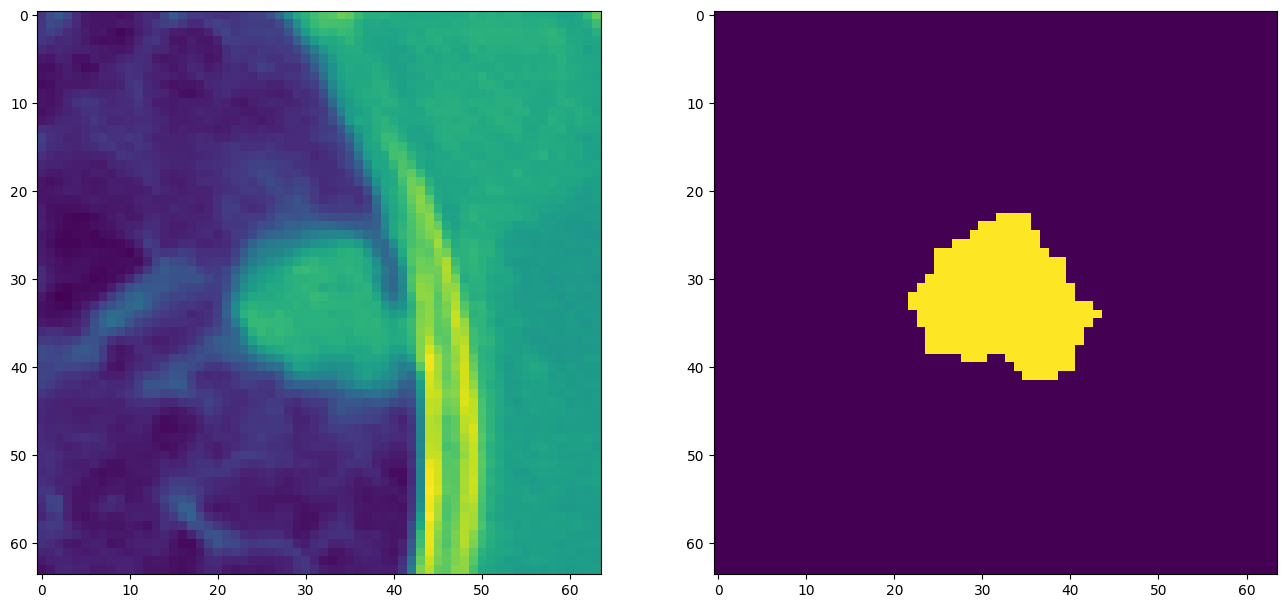

In [ ]:

imgg,mskk=[],[]
for sbj in range(2):
  try:
    imgg.append(np.load(f"{DATA_PATH}/segmentation/{sbj:04}/CT_image.npy"))
    mskk.append(np.load(f"{DATA_PATH}/segmentation/{sbj:04}/CT_mask.npy"))


  except FileNotFoundError:
    continue

img_ = np.array(imgg)
msk_ = np.array(mskk)
print(msk_.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(img_[0,8,:,:])
ax[1].imshow(msk_[0,7,:,:])

In [ ]:
transform = A.Compose([
    A.Normalize(p=1.0),
    ToTensorV2()
])

In [ ]:
class CTDataset(Dataset):
    def __init__(self, file_list, transform, train=True):
        self.file_list = file_list
        self.train = train
        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        file = file_list[idx]
        img = cv2.imread(file)
        mask = cv2.imread(mask_of(file), 0).clip(0, 1).astype('float32')[np.newaxis, :]
        transformed = transform(image=img, mask=mask)
        img, mask = transformed['image'], transformed['mask']
        if not self.train:
            return img
        else:
            return img, mask

In [ ]:
n_train = 2000
data = CTDataset(file_list[:n_train], transform=transform, train=True)
data_te =CT   Dataset(file_list[n_train:], transform=transform, train=True)

n = len(data)
data_tr, data_va = random_split(data, [int(0.8*n), int(0.2*n)])

dataloader_tr = DataLoader(data_tr, batch_size=config.batch_size, shuffle=True)
dataloader_va = DataLoader(data_va, batch_size=config.batch_size)
dataloader_te = DataLoader(data_te, batch_size=config.batch_size)

In [ ]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        x = self.double_conv(x)
        return x


class DownConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.down_conv = nn.Sequential(
            nn.MaxPool2d(2), DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        x = self.down_conv(x)
        return x
class UpConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.up = nn.ConvTranspose2d(
            in_channels=in_channels,
            out_channels=in_channels // 2,
            kernel_size=2,
            stride=2,
        )
        self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        x = torch.cat([x1, x2], dim=1)
        x = self.conv(x)
        return x

In [ ]:
class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = DoubleConv(in_channels=3, out_channels=64)
        self.down1 = DownConv(in_channels=64, out_channels=128)
        self.down2 = DownConv(in_channels=128, out_channels=256)
        self.down3 = DownConv(in_channels=256, out_channels=512)
        self.up3 = UpConv(in_channels=512, out_channels=256)
        self.up2 = UpConv(in_channels=256, out_channels=128)
        self.up1 = UpConv(in_channels=128, out_channels=64)
        self.out = nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1)

    def forward(self, x):
        x1 = self.conv(x)  # (3, 256, 256) -> (64, 256, 256)
        x2 = self.down1(x1)  # (64, 256, 256) -> (128, 128, 128)
        x3 = self.down2(x2)  # (128, 128, 128) -> (256, 64, 64)
        x = self.down3(x3)  # (256, 64, 64) -> (512, 32, 32)
        x = self.up3(x, x3)  # (512, 32, 32) -> (256, 64, 64)
        x = self.up2(x, x2)  # (256, 64, 64) -> (128, 128, 128)
        x = self.up1(x, x1)  # (128, 128, 128) -> (64, 256, 256)
        out = self.out(x)  # (64, 256, 256) -> (1, 256, 256)
        return torch.sigmoid(out)

In [ ]:
def dice_coef_loss(y_hat, y):
    smooth = 1.0
    intersection = 2.0 * ((y * y_hat).sum()) + smooth
    union = y.sum() + y_hat.sum() + smooth

    return 1 - (intersection / union)


def bce_dice_loss(y_hat, y):
    dicescore = dice_coef_loss(y_hat, y)
    bcescore = nn.BCELoss()
    bceloss = bcescore(y_hat, y)

    return bceloss + dicescore

In [ ]:
class UNetPL(pl.LightningModule):
    def __init__(self, config):
        super().__init__()
        self.model = UNet()
        self.loss_fn = bce_dice_loss
        self.config = config

    def forward(self, x):
        x = self.model(x)
        return x

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.config.lr)
        return optimizer

    def training_step(self, batch, batch_index):
        x, y = batch
        y_hat = self(x)
        loss = self.loss_fn(y_hat, y)
        self.log("train_loss", loss, on_step=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_index):
        x, y = batch
        y_hat = self(x)
        loss = self.loss_fn(y_hat, y)
        self.log("valid_loss", loss)
        return loss

In [ ]:
def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss_fn(y_hat, y)
        self.log("test_loss", loss)
        return loss

    def training_epoch_end(self, outputs):
        print(f"epoch: {self.current_epoch} / {self.config.max_epochs}")
        loss = (sum(output['loss'] for output in outputs) / len(outputs)).item()
        print("train loss:", loss)

    def validation_epoch_end(self, outputs):
        loss = (sum(outputs) / len(outputs)).item()
        print("valid loss:", loss)


In [ ]:
callback_checkpoint = ModelCheckpoint(dirpath='/kaggle/working/', save_top_k=1, monitor='valid_loss')
callback_earlystopping = EarlyStopping(monitor='valid_loss', patience=config.early_stopping_patience)
callbacks = [callback_checkpoint, callback_earlystopping]

model = UNetPL(config)
trainer = pl.Trainer(max_epochs=config.max_epochs, callbacks=callbacks, accelerator='gpu')

trainer.fit(model, dataloader_tr, dataloader_va)

In [ ]:
trainer.test(dataloaders=dataloader_te, ckpt_path='best')

In [ ]:
data_te_x = BrainMriDataset(file_list[n_train:], transform=transform, train=False)
dataloader_te_x = DataLoader(data_te_x, batch_size=1)
preds = trainer.predict(dataloaders=dataloader_te_x, ckpt_path='best')

In [ ]:
idx_list = [444, 400, 700]
fig, ax = plt.subplots(len(idx_list), 3, figsize=(16, 16))

for i, idx in enumerate(idx_list):
    file = file_list[n_train+idx]
    img = cv2.imread(file)
    mask = cv2.imread(mask_of(file), 0)
    pred = torch.squeeze(preds[idx])

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(mask)
    ax[i, 2].imshow(pred)